In [1]:
import scipy.integrate as sci
import numpy as np
import matplotlib.pyplot as plt
import math

# Zadanie 1

In [2]:
def distance(v, t):
    if len(v) != len(t):
        print("Podane wektory są różne długości")
        return
    
    return sci.trapz(v,t)

In [49]:
f = lambda x: 4*x**3
start = 0
end = 100
n_arr = [3, 5, 10, 15]
ax = np.linspace(start, end, 10 * (end - start))

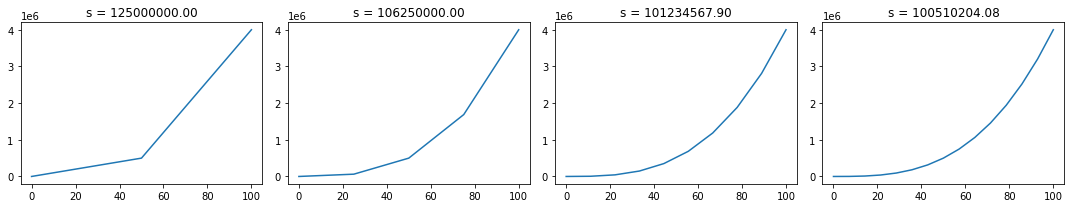

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=len(n_arr), figsize=(15, 3))
for idx, n in enumerate(n_arr):
    t = np.linspace(start, end, n)
    v = [f(i) for i in t]
    axes[idx].plot(t, v)
    axes[idx].set_title("s = {:.2f}".format(distance(v,t)))
fig.tight_layout()

# Zadanie 2


In [5]:
f1 = lambda x: math.exp(-x**2)*math.log(x)**2
f2 = lambda x: 1 / (x**3 - 2*x - 5)
f3 = lambda x: x**5 * math.exp(-x) * math.sin(x)

In [6]:
ax = np.linspace(0.5, 30, 100)
ay_f1 = [f1(x) for x in ax]
ay_f2 = [f2(x) for x in ax]
ay_f3 = [f3(x) for x in ax]

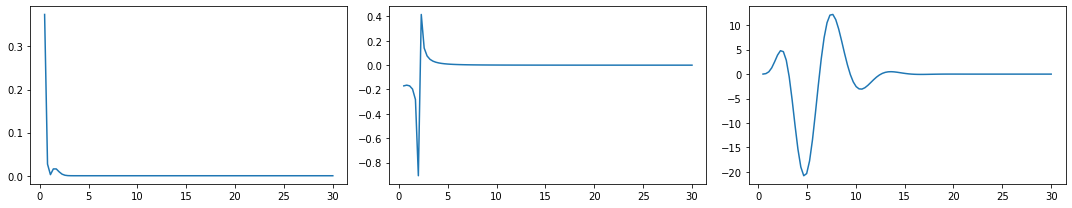

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
axes[0].plot(ax, ay_f1)
axes[1].plot(ax, ay_f2)
axes[2].plot(ax, ay_f3)
fig.tight_layout()

In [8]:
start = [0.5, 2, 5]
end = [3, 5, 10]

In [17]:
for a, b in zip(start, end):
    print("\t\tPrzedział [{}, {}] dla 20 równoodległych punktów\n".format(a,b))
    print("   \tSimpson \t\t\tRomberg")
    x = np.linspace(a, b, 10)
    y1 = [f1(i) for i in x]
    y2 = [f2(i) for i in x]
    y3 = [f3(i) for i in x]
    simp1 = sci.simpson(y1, x)
    simp2 = sci.simpson(y2, x)
    simp3 = sci.simpson(y3, x)
    adapt1 = sci.romberg(f1, a, b)
    adapt2 = sci.romberg(f2, a, b)
    adapt3 = sci.romberg(f3, a, b)
    print("f1:\t {:.8f}\t\t\t{:.8f}".format(simp1, adapt1))
    print("f2:\t {:.8f}\t\t\t{:.8f}".format(simp2, adapt2))
    print("f3:\t {:.8f}\t\t\t{:.8f}\n".format(simp3, adapt3))
    
    

		Przedział [0.5, 3] dla 20 równoodległych punktów

   	Simpson 			Romberg
f1:	 0.06800457			0.06016514
f2:	 0.05511271			-1.20416623
f3:	 6.00968861			6.02506357

		Przedział [2, 5] dla 20 równoodległych punktów

   	Simpson 			Romberg
f1:	 0.00266163			0.00260927
f2:	 0.07848882			0.11204759
f3:	 -20.72094034			-20.74666479

		Przedział [5, 10] dla 20 równoodległych punktów

   	Simpson 			Romberg
f1:	 0.00000000			0.00000000
f2:	 0.01618726			0.01615480
f3:	 8.15009668			7.95743357



# Zadanie 3

In [33]:
f4 = lambda x, y: 1 / (math.sqrt(x + y)*(1 + x + y)) if 0 <= x <= 1 and 0 <= y <= 1 - x else 0
f5 = lambda x, y: x**2 + y**2 

In [21]:
f5(10, 10)

0

### 1.

In [22]:
sci.dblquad(f4, 0, 1, lambda x: 0, lambda x: 1 - x)

(0.42920367291278205, 2.1487517714663153e-08)

### 2.

In [37]:
n = 100
x = np.linspace(-3, 3, n)
y = np.linspace(-5, 5, n)
X, Y = np.meshgrid(x, y)

In [41]:
trapz = np.trapz(
    np.trapz(f5(X, Y), x, axis=1),
    y,
    axis=0
)
dbq = sci.dblquad(f5, -3, 3, -5, 5)[0]

In [42]:
print("Metoda trapezów: {}\nMetoda adaptacyjna: {}".format(trapz, dbq))

Metoda trapezów: 680.1387613508825
Metoda adaptacyjna: 680.0
